In [2]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')

1

In [3]:
import numpy as np
import pandas as pd
import datetime
from pycmqlib3.utility import misc

from pycmqlib3.utility.dbaccess import *
from pycmqlib3.utility import dataseries
from pycmqlib3.analytics.tstool import *
from pycmqlib3.analytics.btmetrics import *


In [4]:
from IPython.core.display import display, HTML
import matplotlib

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams['figure.figsize'] = (12, 8)

# define product groups and start times

In [4]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF", 'nr']
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg', 'PF'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'b'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA', 'lh', 'PK',] # 'CY',] 

ags_all_mkts = ags_oil_mkts + ags_soft_mkts

eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF', 'TS']

fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts

In [5]:
setting_dict = {
    'rb': [datetime.date(2009,8,13), datetime.date(2009,8,13), 5000, '-20b'], 
    'hc': [datetime.date(2014,3,21), datetime.date(2015,12,11), 5000, '-20b'],
    'i': [datetime.date(2013,10,18), datetime.date(2014,4,10), 5000, '-20b'],
    'j': [datetime.date(2011,4,15), datetime.date(2012,5,7), 5000, '-20b'],
    'jm': [datetime.date(2013,3,22), datetime.date(2013,3,22), 5000, '-20b'],
    'ru': [datetime.date(2008,10,10), datetime.date(2008,10,10), 5000, '-20b'], 
    'FG': [datetime.date(2012,12,7), datetime.date(2012,12,7), 5000, '-20b'], 
    'ZC': [datetime.date(2013,9,26), datetime.date(2013,9,26), 5000, '-20b'],
    'SM': [datetime.date(2016,7,26), datetime.date(2016,10,11), 5000, '-20b'], 
    'SF': [datetime.date(2016,7,27), datetime.date(2017,3,13), 5000, '-20b'],    
    'nr': [datetime.date(2019,8,12), datetime.date(2019,8,12), 5000, '-20b'],
    'cu': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'], 
    'al': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],
    'zn': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],
    'pb': [datetime.date(2014,7,25), datetime.date(2014,7,25), 5000, '-20b'],
    'ni': [datetime.date(2015,6,17), datetime.date(2015,6,17), 5000, '-20b'], 
    'sn': [datetime.date(2017,5,2), datetime.date(2017,5,2), 5000, '-20b'],
    'ss': [datetime.date(2019,9,25), datetime.date(2020, 1, 6), 5000, '-20b'],
    
    'l': [datetime.date(2008,1,18), datetime.date(2010,4,14), 5000, '-20b'],
    'pp': [datetime.date(2014,2,28), datetime.date(2014,2,28), 5000, '-20b'], 
    'v': [datetime.date(2009,5,25), datetime.date(2010,8,16), 5000, '-20b'],   
    'TA': [datetime.date(2007,7,10), datetime.date(2008,7,10), 5000, '-20b'],
    'MA': [datetime.date(2011,10,28), datetime.date(2013,10,22), 5000, '-20b'], 
    'sc': [datetime.date(2018, 3, 26), datetime.date(2018,8,30), 5000, '-20b'],
    'bu': [datetime.date(2015, 1,16), datetime.date(2015,7,1), 5000, '-20b'],
    'fu': [datetime.date(2018, 7, 17), datetime.date(2018,10,10), 5000, '-20b'],
    'lu': [datetime.date(2020, 10, 9), datetime.date(2020, 10, 9), 5000, '-20b'], 
    'eb': [datetime.date(2020, 5, 6), datetime.date(2020, 6, 1), 5000, '-20b'],
    'eg': [datetime.date(2019, 4, 2), datetime.date(2019, 4, 2), 5000, '-20b'],
    'pg': [datetime.date(2020, 9, 7), datetime.date(2020, 9, 7), 5000, '-20b'],
    'PF': [datetime.date(2021,1,5), datetime.date(2021,3,1), 5000, '-20b'],
        
    'a': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],
    'b': [datetime.date(2019,7,1), datetime.date(2019,7,1), 5000, '-20b'],
    'm': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],
    'RM': [datetime.date(2012,12,28), datetime.date(2012,12,28), 5000, '-20b'], 
    'y': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],  
    'p':  [datetime.date(2008,1,2), datetime.date(2008,1,2), 4000, '-20b'], 
    'OI': [datetime.date(2013,2,21), datetime.date(2013,2,21), 5000, '-20b'], 
    'c': [datetime.date(2008,1,2), datetime.date(2008,1,2), 5000, '-20b'],
    'cs': [datetime.date(2014,12,19), datetime.date(2014,12,19), 5000, '-20b'], 
    
    'UR': [datetime.date(2019, 8, 9), datetime.date(2019, 8, 9), 5000, '-20b'],
    'SA': [datetime.date(2019,12,6), datetime.date(2019,12,6), 5000, '-20b'],
    'CF': [datetime.date(2008,7,14), datetime.date(2008,7,14), 5000, '-20b'], 
    'CY': [datetime.date(2017, 9, 1), datetime.date(2017, 9, 1), 5000, '-20b'],
    'SR': [datetime.date(2008,7,10), datetime.date(2008,7,10), 5000, '-20b'],
    'AP': [datetime.date(2017,12,22), datetime.date(2017,12,22), 5000, '-20b'],
    'jd': [datetime.date(2013,11,8), datetime.date(2013,11,8), 5000, '-20b'], 
    'lh': [datetime.date(2021,1,8), datetime.date(2021,1,8), 5000, '-20b'],    
    'PK': [datetime.date(2021,2,1), datetime.date(2021,2,1), 5000, '-20b'],
    'CJ': [datetime.date(2019,4,30), datetime.date(2019,4,30), 5000, '-20b'],
    'rr': [datetime.date(2019, 9, 1), datetime.date(2019, 9, 1), 5000, '-20b'],
    'sp': [datetime.date(2018,11,27), datetime.date(2018,11,27), 5000, '-20b'],
    
    'au': [datetime.date(2010,1,4), datetime.date(2015,1,16), 5000, '-20b'],
    'ag': [datetime.date(2012,5,10), datetime.date(2019,6,26), 5000, '-20b'],
    'IF': [datetime.date(2010,5,1), datetime.date(2010,5,1), 5000, '-20b'], 
    'IH': [datetime.date(2015,5,1), datetime.date(2015,5,1), 5000, '-20b'], 
    'IC': [datetime.date(2015,5,1), datetime.date(2015,5,1), 5000, '-20b'], 
    'TF': [datetime.date(2019,6,1), datetime.date(2019,6,1), 5000, '-20b'],
    'T': [datetime.date(2019,4,1), datetime.date(2019,4,1), 5000, '-20b'], 
    'TS': [datetime.date(2018, 9, 1), datetime.date(2018, 9, 1), 5000, '-20b'],
    'PM': [datetime.date(2013,10,1), datetime.date(2013,10,1), 5000, '-20b'], 
    'RI': [datetime.date(2013,1,1), datetime.date(2013,1,1), 5000, '-20b'], 
    'WH': [datetime.date(2014,5,1), datetime.date(2014,5,1), 5000, '-20b'], 
}


In [6]:
lead_lag_config = {
    'll_left': -20,
    'll_right': 120,
    'll_spacing': 5,
    'll_sub_win': [(datetime.date(2008, 1, 1), datetime.date(2016, 12, 31)), 
                   (datetime.date(2017, 1, 1), datetime.date(2022, 12, 31)),],
}

ll_keys = ['fullsample'] + ['%s:%s' % (sd.strftime('%Y-%b-%d'), ed.strftime('%Y-%b-%d')) for sd, ed in lead_lag_config['ll_sub_win']]


# load historical data

In [ ]:
start_d = datetime.date(2011,1,1)
end_d = datetime.date(2022,12,21)
shift_mode = 1
roll_name = 'oi_roll'
sim_markets = ['rb', 'hc', 'i', 'cu', 'al', 'zn', 'ss', 'sc']
data_df = pd.DataFrame()
fields = []
for prodcode in sim_markets:
    start_date = max(start_d, setting_dict[prodcode][0])
    end_date = end_d
    max_nb = 2
#     if prodcode in ['cu', 'al', 'zn', 'ss',]:
#         max_nb = 3
    nb_df = dataseries.nearby(prodcode,
                              [i for i in range(1, max_nb+1)],
                              start_date=start_date, 
                              end_date = end_date, 
                              shift_mode = shift_mode,
                              freq='d', 
                              roll_name=roll_name)
    for nb in nb_df.keys():
        if (len(fields) == 0) and (len(nb_df[nb])>0):
            fields = nb_df[nb].columns
        nb_df[nb]['product'] = prodcode
        nb_df[nb]['code'] = f'c{nb}'
        data_df = data_df.append(nb_df[nb])
    
df = pd.pivot_table(data_df.reset_index(), index='date', columns = ['product', 'code'], values = list(fields), aggfunc = 'last')
df = df.reorder_levels([1, 2, 0], axis=1).sort_index(axis=1)
df.columns.rename(['field', 'product', 'code'], inplace = True)
df.tail(5)

C:\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


# Calculate features

In [28]:
# param_dict = {
#     'basmom': [5, 10, 20, 30, 60,],
#     'mom': [5, 10, 20, 30, 60,],
#     'upratio': [20, 40, 60, 120],
#     'skew': [20, 40, 60, 120],
#     'kurt': [20, 40, 60, 120],
# }
param_dict = {
    'basmom': [],
    'mom': [],
    'upratio': [],
    'skew': [],
    'kurt': [],
}

win = 120
factor_name = 'ryield'
for prodcode in sim_markets:
    if shift_mode == 1:
        df[(prodcode, 'factor', 'ryield')]= np.log(df[(prodcode, 'c1', 'close')] - df[(prodcode, 'c1', 'shift')]) - \
                                            np.log(df[(prodcode, 'c2', 'close')] - df[(prodcode, 'c2', 'shift')])
    elif shift_mode == 0:
        df[(prodcode, 'factor', 'ryield')] = np.log(df[(prodcode, 'c1', 'close')])-np.log(df[(prodcode, 'c2', 'close')])
    elif shift_mode == 2:
        df[(prodcode, 'factor', 'ryield')]= np.log(df[(prodcode, 'c1', 'close')])-np.log(df[(prodcode, 'c2', 'close')]) - \
                                            df[(prodcode, 'c0', 'shift')] + df[(prodcode, 'c1', 'shift')]
    df[(prodcode, 'factor', 'ryield')] = df[(prodcode, 'factor', 'ryield')]/((df[(prodcode, 'c1', 'expiry')] - df[(prodcode, 'c0', 'expiry')]).dt.days/365*12)
    
#    df[(prodcode, 'factor', factor_name)] = df[(prodcode, 'factor', 'ryield')]/df[(prodcode, 'factor', 'ryield')].pow(2).rolling(win).mean().pow(0.5)
    
#     for win in param_dict['basmom']:
#         df[(prodcode, 'factor', 'basmom%s' % (win))] = df[(prodcode, 'c0', 'log_ret')].rolling(win).sum() \
#                                                         - df[(prodcode, 'c1', 'log_ret')].rolling(win).sum()    
#     for win in param_dict['mom']:
#         df[(prodcode, 'factor', 'mom%s' % (win))] = df[(prodcode, 'c0', 'log_ret')].rolling(win).sum()
    
#     for win in param_dict['upratio']:
#         df[(prodcode, 'factor', 'upratio%s' % (win))] = df[(prodcode, 'c0', 'log_ret')].rolling(win).agg(lambda x: (x>0).sum()/win)-0.5
    
#     for win in param_dict['skew']:
#         df[(prodcode, 'factor', 'skew%s' % (win))] = df[(prodcode, 'c0', 'log_ret')].rolling(win).skew()
        
#     for win in param_dict['kurt']:
#         df[(prodcode, 'factor', 'kurt%s' % (win))] = df[(prodcode, 'c0', 'log_ret')].rolling(win).kurt()

df_pxchg = df[df.columns[(df.columns.get_level_values(2) == 'price_chg') & (df.columns.get_level_values(1) == 'c1')]].droplevel([1, 2],axis=1)
df_in = df[df.columns[(df.columns.get_level_values(2) == factor_name) & (df.columns.get_level_values(1) == 'factor')]].droplevel([1, 2],axis=1)    
print(df_pxchg, df_in)

KeyError: ('rb', 'c1', 'close')

In [12]:
fill_backward = False
smooth_win = 1
sig_smooth = tstool.exp_smooth(df_in, hl = smooth_win, fill_backward=fill_backward)

demean = False
mean_win = 244
vol_win = 244
if demean:
    sig_scored = tstool.ts_score(sig_smooth, hl_mean=mean_win, min_obs_mean=mean_win, fill_backward_mean=fill_backward, 
                          hl_vol=vol_win, min_obs_vol=vol_win, fill_backward_vol=fill_backward)
else:
    sig_scored = tstool.ts_scale(sig_smooth, hl = vol_win, min_obs=vol_win, fill_backward=fill_backward)

signal_cap = 2.0

score_capped = tstool.cap(sig_scored, -signal_cap, signal_cap)
score_filled = tstool.filldown(score_capped, 2)
score = tstool.lag(score_filled, 1)

vol_scale = 40
asset_vol = tstool.exp_smooth(df_in**2, hl = vol_scale, fill_backward=fill_backward)**0.5
holding = score/asset_vol

In [ ]:
exclude_list = ['ZC', 'PK']

In [13]:
commod_list = None #['hc']
if commod_list:
    btmetrics = MetricsBase(holdings = holding[commod_list], returns = df_pxchg[commod_list])
else:
    btmetrics = MetricsBase(holdings = holding, returns = df_pxchg)


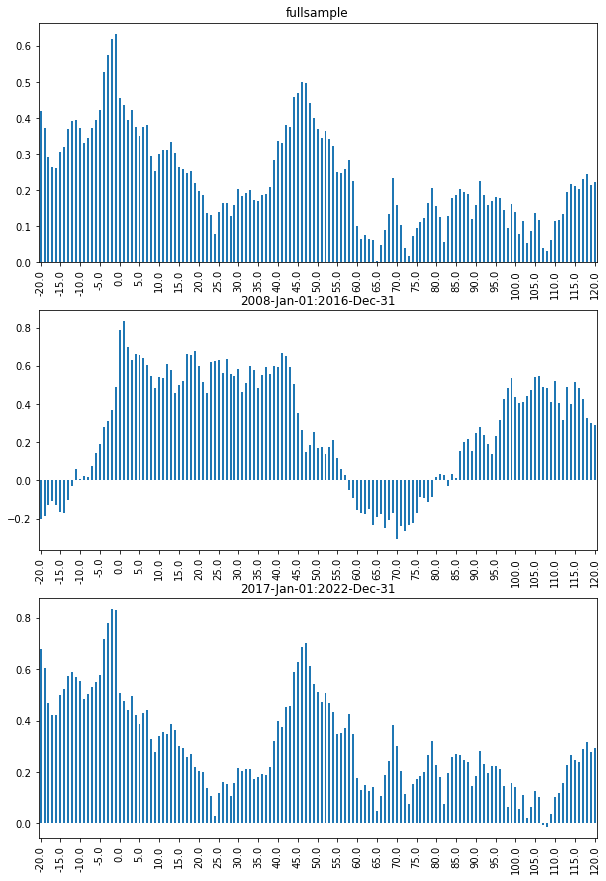

long short PNL stats: total pnl
 {'asset_pnl': field               AP            CF            CJ           FG           MA  \
date                                                                           
2011-01-04         NaN           NaN           NaN          NaN          NaN   
2011-01-05         NaN           NaN           NaN          NaN          NaN   
2011-01-06         NaN           NaN           NaN          NaN          NaN   
2011-01-07         NaN           NaN           NaN          NaN          NaN   
2011-01-10         NaN           NaN           NaN          NaN          NaN   
...                ...           ...           ...          ...          ...   
2022-07-22 -237.795152  22545.864788 -13732.482638  1826.914799  2430.567855   
2022-07-25  -19.728675  -5996.050838  21881.197131 -4024.794022  -766.815654   
2022-07-26  179.213256 -23186.881777  -1593.802914  -648.139690  3428.095599   
2022-07-27  -13.207798 -20844.168642   4447.859344  -526.044638 -1938.609

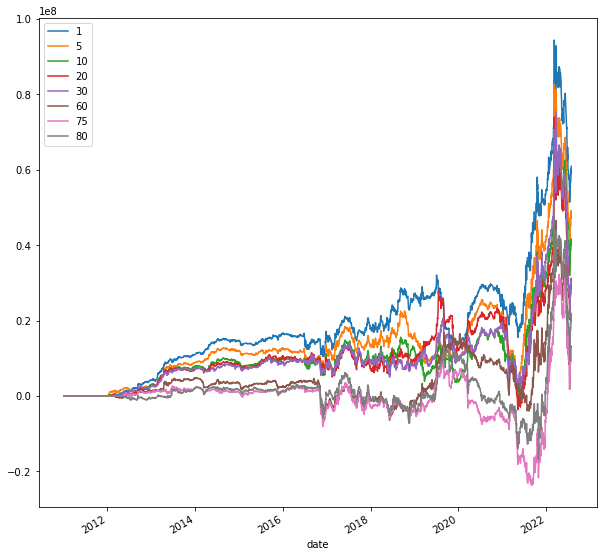

smoothed PNL
                  1         5         10        20        30        60  \
sharpe     0.492042  0.422539  0.376787  0.343749  0.320419  0.263229   
sharpe_fh  0.931360  0.794214  0.733298  0.670159  0.631554  0.571793   
sharpe_sh  0.513103  0.441664  0.388324  0.351867  0.325531  0.249759   

                 75        80  
sharpe     0.243932  0.238341  
sharpe_fh  0.554130  0.549116  
sharpe_sh  0.220388  0.211464  


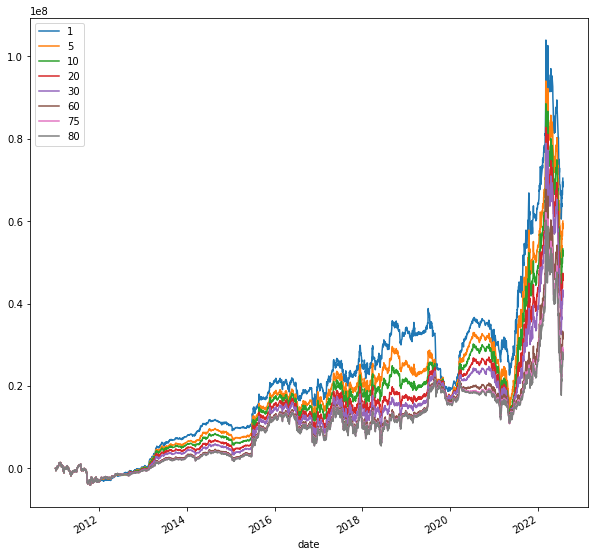

rolling window results: tilt:
 {'asset_pnl': field               AP            CF           CJ          FG           MA  \
date                                                                         
2011-01-04         NaN           NaN          NaN         NaN          NaN   
2011-01-05         NaN           NaN          NaN         NaN          NaN   
2011-01-06         NaN           NaN          NaN         NaN          NaN   
2011-01-07         NaN           NaN          NaN         NaN          NaN   
2011-01-10         NaN           NaN          NaN         NaN          NaN   
...                ...           ...          ...         ...          ...   
2022-07-22  110.951953  31356.844505 -5093.138431  182.468823 -1362.668402   
2022-07-25   17.064689  -4843.024206  8626.709092 -432.764876   409.357632   
2022-07-26 -244.154925 -13819.172987  -654.043806  -75.768649 -1234.929619   
2022-07-27    5.442741 -12631.416940  1963.036485  -78.876041   762.577943   
2022-07-28   21.389

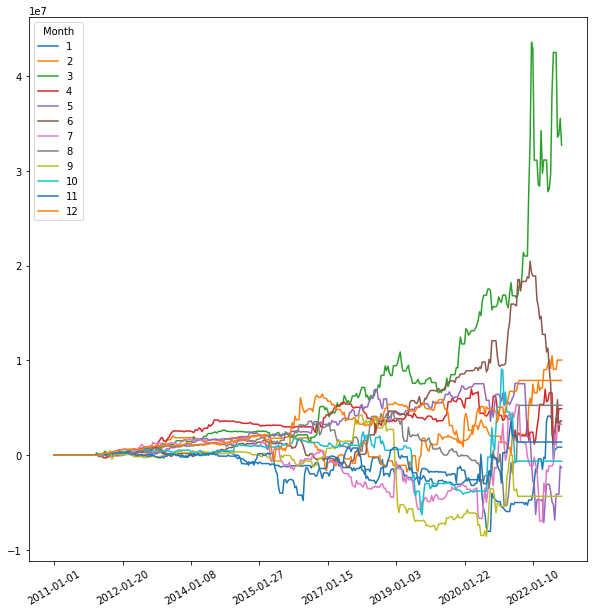

monthday sharpe stats
 MonthDay        1-4     10-14     15-20       5-9       >20
sharpe    -0.501711  0.156846  0.724048  0.547731  3.052892
sharpe_fh  0.183552  1.396119  1.231340 -0.487453  2.562314
sharpe_sh -0.748588 -0.049262  0.898487  0.870199  3.812935


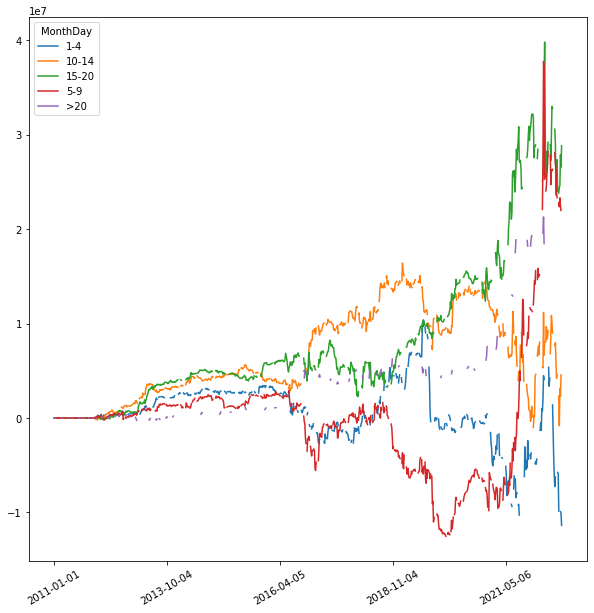

week sharpe stats
 WeekDay           0         1         2         3         4
sharpe    -0.429473  0.311806  1.319389  0.224270  0.847088
sharpe_fh  0.948773 -0.372028  1.076136  1.711554  1.805508
sharpe_sh -0.758382  0.495540  1.739341  0.089572  0.997538


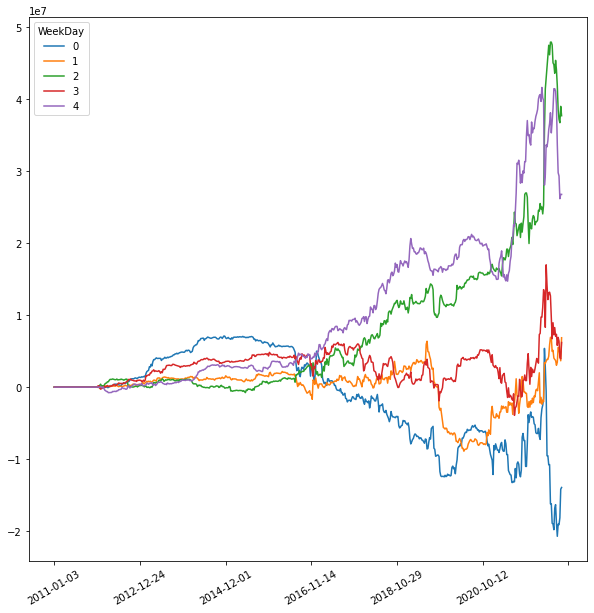

annual sharpe stats
 Year       2011      2012      2013      2014      2015      2016      2017  \
sharpe      NaN  1.530852  2.934774  1.784496  0.725004 -0.171921  0.384064   
sharpe_fh   NaN  1.443352  3.335166  2.903822 -0.215769 -0.948990  1.107307   
sharpe_sh   NaN  1.488115  2.545199  0.444260  1.293448  0.026879 -0.397802   

Year           2018      2019      2020      2021      2022  
sharpe     1.041952 -1.443149  1.655910  1.356289  0.142764  
sharpe_fh  1.181410  0.585845  3.822329  0.362180  0.381292  
sharpe_sh  0.824449 -2.707235 -0.298681  2.027287 -0.122684  


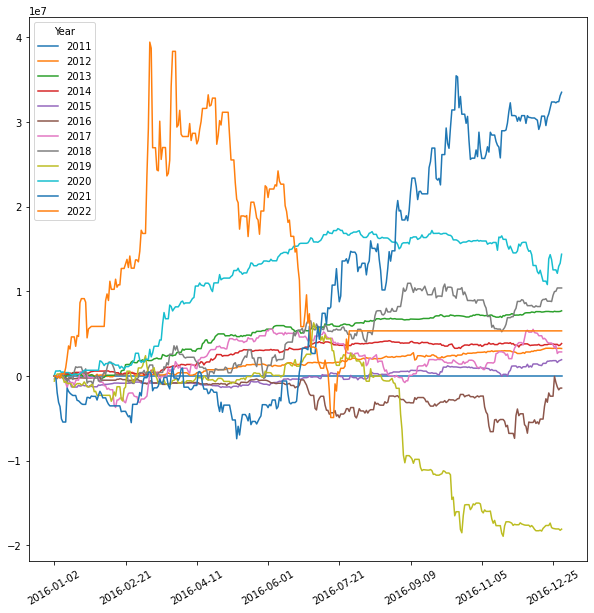

{'turnover_perc_y': field              AP         CF         CJ         FG         MA         OI  \
date                                                                           
2011-12-31        NaN        NaN        NaN        NaN        NaN        NaN   
2012-12-31        NaN  16.757168        NaN        NaN   9.465008        NaN   
2013-12-31        NaN  16.278168        NaN   1.564822  21.330837        NaN   
2014-12-31        NaN  19.135272        NaN  14.350639  14.061083  20.645114   
2015-12-31        NaN  16.196885        NaN  22.674886  32.795290  30.007646   
2016-12-31        NaN  26.776985        NaN  36.347838  31.204145   8.610917   
2017-12-31        NaN  25.130483        NaN  24.729570  22.224710   6.629890   
2018-12-31   0.161817   3.569362        NaN  14.716056  19.694006   6.429757   
2019-12-31  11.394438   3.992599        NaN  18.628450  18.506256  22.887010   
2020-12-31  29.611944   8.816420  11.980578  32.598751  15.108555  10.930057   
2021-12-31  20.49775

In [14]:
ll_left = lead_lag_config['ll_left']
ll_right = lead_lag_config['ll_right']
spacing = lead_lag_config['ll_spacing']

leadlag_df = btmetrics.lead_lag(ll_limit_left=ll_left, 
                                ll_limit_right=ll_right,
                                ll_sub_windows=lead_lag_config['ll_sub_win'])

fig, ax = plt.subplots(len(ll_keys), 1)
fig.set_figheight(15)
fig.set_figwidth(10)

for i, key in enumerate(ll_keys):
    ts = leadlag_df['leadlag_sharpes'].loc[key]
    ts.plot(kind='bar', ax = ax[i], title = key)
    new_ticks = np.linspace(ll_left, ll_right, (ll_right-ll_left)//spacing+1)
    ax[i].set_xticks(np.interp(new_ticks, ts.index, np.arange(ts.size)))
    ax[i].set_xticklabels(new_ticks)

plt.show()

ls_pnl = btmetrics.long_short_pnl()
print('long short PNL stats: total pnl\n', ls_pnl['total_pnl_stat'])
print('long short PNL stats: long pnl\n', ls_pnl['long_pnl_stat'])
print('long short PNL stats: short pnl\n', ls_pnl['short_pnl_stat'])


lagged = btmetrics.lagged_pnl(lags=[1, 5, 10, 20, 30, 60, 75, 80])
lagged['cumpnl'].plot(figsize=(10,10))
print('lagged PNL\n', lagged['sharpe'])
plt.show()

smoothed = btmetrics.smoothed_pnl(smooth_hls=[1, 5, 10, 20, 30, 60, 75, 80])
smoothed['cumpnl'].plot(figsize=(10,10))
print('smoothed PNL\n', smoothed['sharpe'])
plt.show()

tilt_timing = btmetrics.tilt_timing(tilt_rolling_window=1*244) # default 3 years  tilt_rolling_window = 3 * 244 
print('rolling window results: tilt:\n', tilt_timing['pnl_tilt_stat'])
print('rolling window results: timing:\n', tilt_timing['pnl_timing_stat'])
print('full sample results: tilt:\n', tilt_timing['pnl_tilt_stat_full_sample'])
print('full sample results: timing:\n', tilt_timing['pnl_timing_stat_full_sample'])

seasonal_pnl = btmetrics.seasonal_pnl()
cumpnl = seasonal_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (10,10))
print('seasonal sharpe stats\n', seasonal_pnl['sharpe_stats'])
plt.show()


monthday_pnl = btmetrics.monthday_pnl()
cumpnl = monthday_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (10,10))
print('monthday sharpe stats\n', monthday_pnl['sharpe_stats'])
plt.show()


week_pnl = btmetrics.week_pnl()
cumpnl = week_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (10,10))
print('week sharpe stats\n', week_pnl['sharpe_stats'])
plt.show()


annual_pnl = btmetrics.annual_pnl()
cumpnl = annual_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (10,10))
print('annual sharpe stats\n', annual_pnl['sharpe_stats'])
plt.show()

turnover = btmetrics.turnover()
print(turnover)

In [175]:
btmetrics.seasonal_pnl()

{'years': [2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2011,
  2012,
  2013,
  2014,
  2015],
 'pnl': Month              1          2         3          4          5          6   \
 2011-01-01   0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
 2011-01-02   0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
 2011-01-03   0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
 2011-01-04   0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
 2011-01-05   0.000000   0.000000  0.000000   0.000000   0.000000   0.000000   
 ...               ...        ...       ...        ...        ...        ...   
 2022-01-27  -9.502483   0.000000  0.000000   6.675489  19.282819 -22.980055   
 2022-01-28  70.524983  37.618587  6.834415  -3.016175   0.000000 -18.657843   
 2022-01-29   0.000000   0.000000 -1.423699  15.520760   0.000000  -1.576940   
 2022-01-30   0.000000   0.000000  1.365241   0.000000   7.632862  -1.964304   
 2022-0

seasonal sharpe stats
 Month            1         2         3         4         5         6   \
sharpe     1.821911  0.425988  0.311703  1.695636 -0.584261  1.715108   
sharpe_fh  0.647617  1.910922  1.851079  2.073673 -1.804309  1.501857   
sharpe_sh  2.510751 -0.217571 -0.433128  1.279133  0.073466  1.945501   

Month            7         8         9         10        11        12  
sharpe     1.077537 -0.189106  0.212129 -1.099520  0.031251  0.401988  
sharpe_fh  0.029316 -1.320979  1.895191 -0.165809  1.044661 -1.084144  
sharpe_sh  2.111808  0.720804 -1.103620 -1.555914 -0.324041  1.270897  


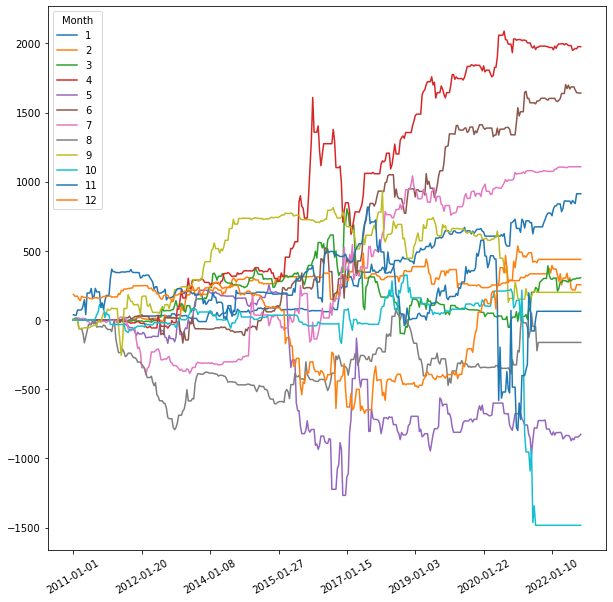